In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

print("libraries imported")

libraries imported


In [2]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [11]:
df = pd.read_excel("BSE15yrsmonthly.xlsx")
df.head(2)

,Date,Price
0,2020-05-01,30672.59
1,2020-04-01,31743.08


In [12]:
period = df['Date'].max() - df['Date'].min()
print (period)

6271 days 00:00:00


In [13]:
df = df.groupby('Date')['Price'].sum().reset_index()
df.head()

,Date,Price
0,2003-03-01,3048.72
1,2003-04-01,2959.79
2,2003-05-01,3180.75
3,2003-06-01,3607.13
4,2003-07-01,3792.61


In [14]:
df2 = df.set_index('Date')
df2.index

DatetimeIndex(['2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01',
               ...
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=207, freq=None)

In [15]:
df2.head()

,Price
Date,
2003-03-01,3048.72
2003-04-01,2959.79
2003-05-01,3180.75
2003-06-01,3607.13
2003-07-01,3792.61


In [36]:
# Resample on Month Start - MS
df2 = df2['Price'].resample('MS').mean()
df2.head()

Date
2003-03-01    3048.72
2003-04-01    2959.79
2003-05-01    3180.75
2003-06-01    3607.13
2003-07-01    3792.61
Freq: MS, Name: Price, dtype: float64

In [37]:
# Using Plotly Graph Objects _with Range Slider
import plotly.graph_objects as go
import plotly.express as px

fig = px.line(df, x='Date', y='Price', title='BSE Index Monthly Closing price - 2003-2020')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

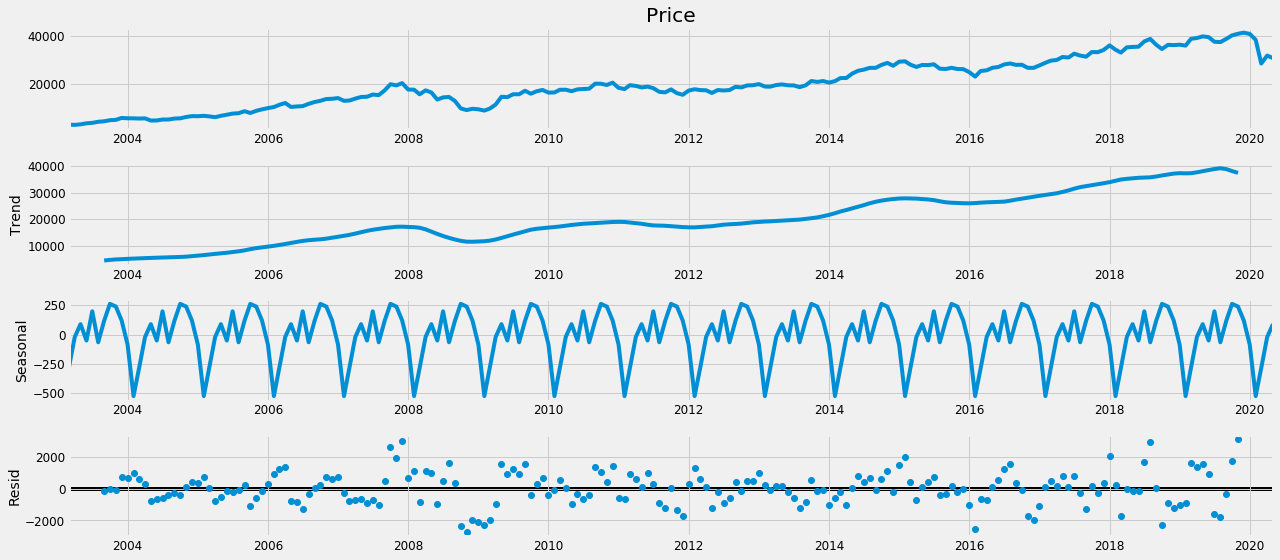

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df2, model='additive') # using the date indexed dataframe 'df2' instead of 'df'
fig = decomposition.plot()
plt.show()

## ARIMA Forecasting

### Finding the Optimum <b>p,d,q</b> & <b>P,D,Q,m</b> parameters using <b>Grid Search </b>

In [39]:
import itertools
import warnings
warnings.filterwarnings("ignore")

In [40]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4713.04898835665
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4549.66543191088
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3792.8515487786144
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3570.8574470189014
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3784.41257409889
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3742.9012665478112
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3589.1604376708374
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3572.4056254058446
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4542.989988202299
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4248.064664451238
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3646.787619328429
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3425.3662823746035
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3631.7524894797007
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4233.016376323634
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3427.030930977993
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3395.673775435089
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3518.7988740772407
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3321.2058817539014
ARIM

#### Lowest AIC -  3121.156 is  found at (0, 1, 1)x(1, 1, 1, 12)

### Fitting the ARIMA Model :

In [41]:
mod = sm.tsa.statespace.SARIMAX(df2,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0598      0.066     -0.905      0.365      -0.189       0.070
ar.S.L12      -0.3200      0.114     -2.801      0.005      -0.544      -0.096
ma.S.L12      -1.1294      0.146     -7.739      0.000      -1.415      -0.843
sigma2      1.423e+06   3.58e+05      3.972      0.000    7.21e+05    2.12e+06


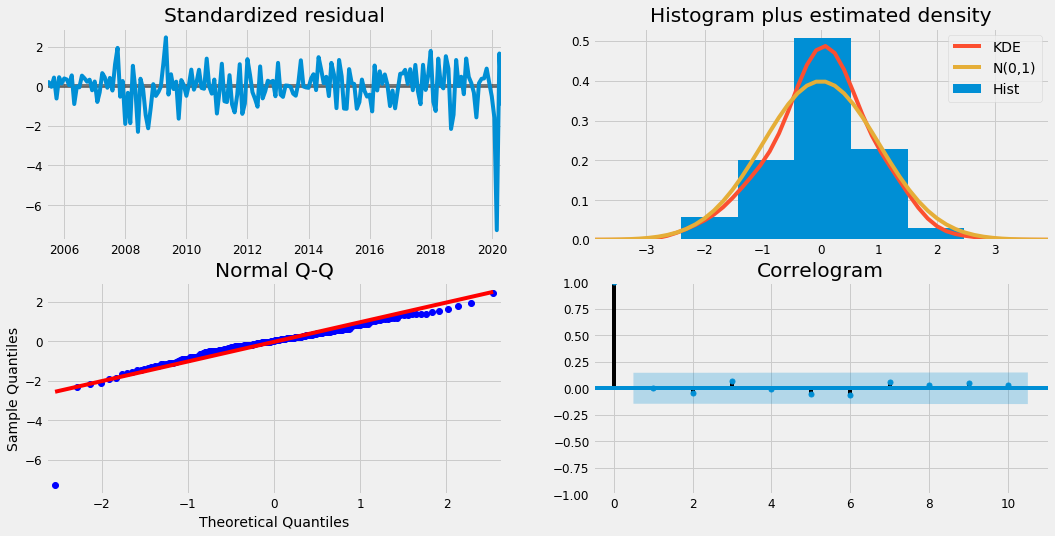

In [42]:
# Model Diagnostics 
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating Forecasts : Test Predictions for last 5 Yrs 

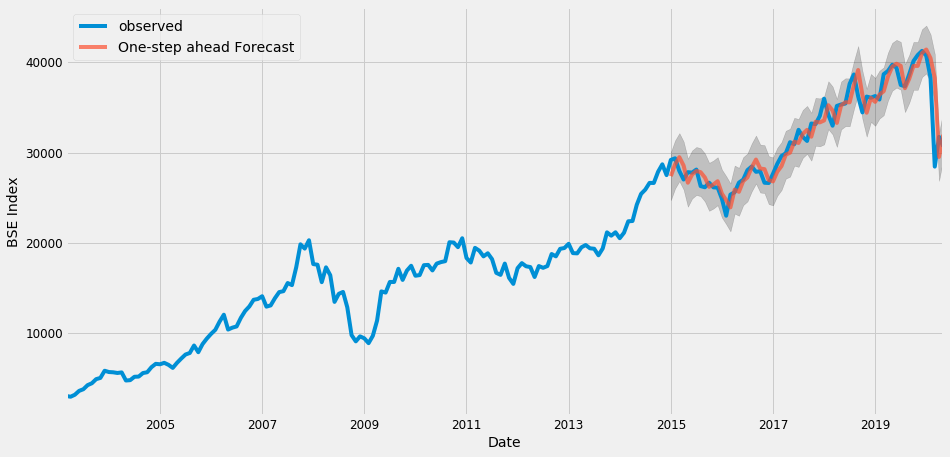

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df2['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BSE Index')
plt.legend()

plt.show()

In [44]:
y_forecasted = pred.predicted_mean
y_truth = df2['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2926207.03
The Root Mean Squared Error of our forecasts is 1710.62


### Producing & Visualising Forecasts

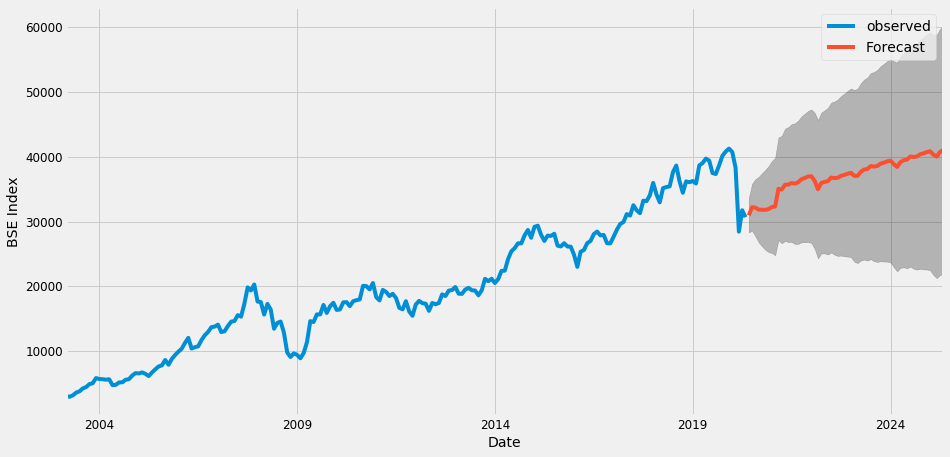

In [47]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()

ax = df2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BSE Index')

plt.legend()
plt.show()

In [49]:
pred_ci.head(7)

,lower Price,upper Price
2020-06-01,28318.787001,33607.437726
2020-07-01,28580.145684,35839.513116
2020-08-01,27743.398642,36542.654642
2020-09-01,26789.189004,36896.384301
2020-10-01,26191.189542,37455.464369
2020-11-01,25646.873830,37959.971653
2020-12-01,25281.218001,38560.557918
